In [ ]:
# This makes a plot of the sky-projected HZ around Altair with overplotted
# long LBT baselines, and also violin plots to show sampling of position angles

# Created 2020 Oct. 28 by E.S.

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import pandas as pd
import plotly
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from astropy.io import fits
from sympy.plotting import plot_implicit
from matplotlib.ticker import FuncFormatter

In [2]:
# set constants

PA_deg = 301.1 # position angle, in degrees E of N
theta_deg = 50.7 # in degrees
R = 10 # semimajor radius

In [3]:
## THESE ARE TEST ANGLES ONLY!
# set constants

'''
PA_deg = 90 # position angle, in degrees E of N
theta_deg = 60 # in degrees
R = 10 # semimajor radius
'''

'\nPA_deg = 90 # position angle, in degrees E of N\ntheta_deg = 60 # in degrees\nR = 10 # semimajor radius\n'

In [4]:
# transform some angles

phi_deg = 360-PA_deg # given way we transform coordinates, turn position angle to the rotation of coordinate system
phi_rad = np.multiply(phi_deg,np.pi/180.) # rotation CCW in observer plane, in degrees
theta_rad = np.multiply(theta_deg,np.pi/180.) # inclination, in degrees

In [5]:
# set up a grid

x_prime = np.linspace(-7, 7, 100)
y_prime = np.linspace(-7, 7, 100)

x_prime_grid, y_prime_grid = np.meshgrid(x_prime,y_prime)

In [6]:
# method 1: analystically define parts of the equation defining an ellipse 
# (for plotting as a contour)

def part_Aang():
    
    Aang = np.power(np.cos(phi_rad),2) + np.power(np.divide(np.sin(phi_rad),np.cos(theta_rad)),2)
    
    return Aang

def part_Bang():
    
    Bang = np.power(np.sin(phi_rad),2) + np.power(np.divide(np.cos(phi_rad),np.cos(theta_rad)),2)
    
    return Bang

def part_Cang():
    
    Cang = np.cos(phi_rad)*np.sin(phi_rad)*(np.divide(1.,np.power(np.cos(theta_rad),2.))-1)
    
    return Cang

def gen_ellipse():
    
    return np.power(x_prime_grid,2.)*part_Aang() + np.power(y_prime_grid,2.)*part_Bang() + \
            2.*x_prime_grid*y_prime_grid*part_Cang()
    

In [7]:
# method 2: use Ellipse patch

ellipse = Ellipse((0, 0), 
                  width=2*R, 
                  height=np.multiply(2*R,np.cos(theta_rad)), 
                  angle=PA_deg)

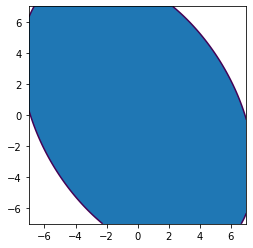

In [9]:
# plot two ellipses, to check convention (use the test parameters in the box further up)

figure, axes = plt.subplots()

# ellipse using contour
axes.contour(x_prime_grid,y_prime_grid,gen_ellipse(),[R**2])
axes.set_aspect(1)

# ellipse using patch
axes.add_patch(ellipse)

plt.savefig("junk.png")

<Figure size 432x288 with 0 Axes>

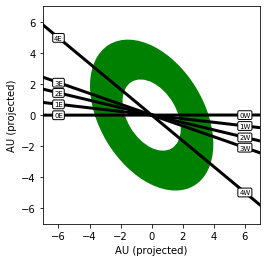

In [28]:
# plot one white ellipse over a green one to denote HZ around Altair

R_in = 2.5 # inner radius of HZ
R_out = 5.3 # out radius

plt.clf()

figure, axes = plt.subplots()

# outer ellipse
ellipse_out = Ellipse((0, 0), 
                  width=2*R_out, 
                  height=np.multiply(2*R_out,np.cos(theta_rad)), 
                  angle=PA_deg,
                  facecolor="green")

# inner ellipse (the hole)
ellipse_in = Ellipse((0, 0), 
                  width=2*R_in, 
                  height=np.multiply(2*R_in,np.cos(theta_rad)), 
                  angle=PA_deg,
                  facecolor="white")

# ellipse using patch
axes.add_patch(ellipse_out)
axes.add_patch(ellipse_in)

# check: ellipse using contour
#axes.contour(x_prime_grid,y_prime_grid,gen_ellipse(),[R_out**2])
#axes.contour(x_prime_grid,y_prime_grid,gen_ellipse(),[R_in**2])

# overplot baselines (angles deg E of N)
strip0_avg = -39.68
strip1_avg = -19.218
strip2_avg = -13.43
strip3_avg = -6.63
strip4_avg = 0.04

angles_array = [-39.68,-19.218,-13.43,-6.63,0.04]

coords_x_0 = [0,0,0,0,0]
coords_x_1 = [0,0,0,0,0]
coords_y_0 = 10*np.tan(np.multiply(angles_array,np.pi/180.))
#coords_y_1 = 10*np.tan(np.multiply(angles_array,np.pi/180.))

string_array_E = ["4E","3E","2E","1E","0E"]
string_array_W = ["4W","3W","2W","1W","0W"]


axes.set_xlim([-7,7])
axes.set_ylim([-7,7])
axes.set_aspect(1)

for i in range(0,5):
    plt.plot([0,10],[0,coords_y_0[i]],color="k",linewidth=3)
    plt.plot([0,-10],[0,-coords_y_0[i]],color="k",linewidth=3)
    axes.annotate(string_array_E[i],
                    xy=[0,0],
                    xytext=[-6,-np.add(0.6*coords_y_0[i],0.2)],
                    textcoords="data",
                    ha='center', va='bottom',
                  fontsize=7,
                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    axes.annotate(string_array_W[i],
                    xy=[0,0],
                    xytext=[6,np.subtract(0.6*coords_y_0[i],0.2)],
                    textcoords="data",
                    ha='center', va='bottom',
                  fontsize=7,
                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

plt.xlabel("AU (projected)")
plt.ylabel("AU (projected)")

plt.savefig("junk.pdf")
#plt.show()

<Figure size 432x288 with 0 Axes>

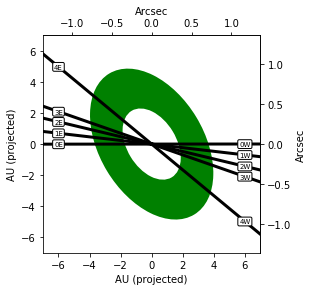

In [38]:
# plot one white ellipse over a green one to denote HZ around Altair

R_in = 2.5 # inner radius of HZ
R_out = 5.3 # out radius

plt.clf()

figure, axes = plt.subplots()

# stuff for secondary axis
#f = lambda q: np.divide(q,5.13)
#finv = lambda x: np.divide(q,5.13)
#axes2 = axes.twinx()
#axes.get_shared_y_axes().join(axes,axes2)

def au_to_asec(x):
    return np.divide(x,5.13)

def asec_to_au(x):
    return np.multiply(x,5.13)

# outer ellipse
ellipse_out = Ellipse((0, 0), 
                  width=2*R_out, 
                  height=np.multiply(2*R_out,np.cos(theta_rad)), 
                  angle=PA_deg,
                  facecolor="green")

# inner ellipse (the hole)
ellipse_in = Ellipse((0, 0), 
                  width=2*R_in, 
                  height=np.multiply(2*R_in,np.cos(theta_rad)), 
                  angle=PA_deg,
                  facecolor="white")

# ellipse using patch
axes.add_patch(ellipse_out)
axes.add_patch(ellipse_in)

# check: ellipse using contour
#axes.contour(x_prime_grid,y_prime_grid,gen_ellipse(),[R_out**2])
#axes.contour(x_prime_grid,y_prime_grid,gen_ellipse(),[R_in**2])

# overplot baselines (angles deg E of N)
strip0_avg = -39.68
strip1_avg = -19.218
strip2_avg = -13.43
strip3_avg = -6.63
strip4_avg = 0.04

angles_array = [-39.68,-19.218,-13.43,-6.63,0.04]

coords_x_0 = [0,0,0,0,0]
coords_x_1 = [0,0,0,0,0]
coords_y_0 = 10*np.tan(np.multiply(angles_array,np.pi/180.))
#coords_y_1 = 10*np.tan(np.multiply(angles_array,np.pi/180.))

string_array_E = ["4E","3E","2E","1E","0E"]
string_array_W = ["4W","3W","2W","1W","0W"]


axes.set_xlim([-7,7])
axes.set_ylim([-7,7])
axes.set_aspect(1)

for i in range(0,5):
    plt.plot([0,10],[0,coords_y_0[i]],color="k",linewidth=3)
    plt.plot([0,-10],[0,-coords_y_0[i]],color="k",linewidth=3)
    axes.annotate(string_array_E[i],
                    xy=[0,0],
                    xytext=[-6,-np.add(0.6*coords_y_0[i],0.2)],
                    textcoords="data",
                    ha='center', va='bottom',
                  fontsize=7,
                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    axes.annotate(string_array_W[i],
                    xy=[0,0],
                    xytext=[6,np.subtract(0.6*coords_y_0[i],0.2)],
                    textcoords="data",
                    ha='center', va='bottom',
                  fontsize=7,
                  bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

# add secondary axes
secax = axes.secondary_xaxis('top', functions=(au_to_asec, asec_to_au))
secax.set_xlabel('Arcsec')
secay = axes.secondary_yaxis('right', functions=(au_to_asec, asec_to_au))
secay.set_ylabel('Arcsec')
    
plt.xlabel("AU (projected)")
plt.ylabel("AU (projected)")

plt.savefig("junk.pdf")
#plt.show()

In [11]:
# read in meta data to extract parallactic angles 
# (and by extension long baseline angles)

df = pd.read_csv("fizeau_altair_180507_metadata.csv")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (13,80,81,84,88,92,149) have mixed types.Specify dtype option on import or set low_memory=False.



In [13]:
# read the lists of frames that were used, and grab the PAs
'''
strip0: lm_180507_004404.fits to lm_180507_006301.fits
strip1: lm_180507_007998.fits to lm_180507_008852.fits
strip2: lm_180507_008853.fits to lm_180507_009708.fits
strip3: lm_180507_009709.fits to lm_180507_010527.fits
strip4: lm_180507_010528.fits to lm_180507_011334.fits
'''
list_A_stripe_0_good_frames = pd.read_csv("data/good_frames_list_A_frames.txt")
list_D_stripe_1_good_frames = pd.read_csv("data/good_files_D_stripe_1_of_4.txt")
list_D_stripe_2_good_frames = pd.read_csv("data/good_files_D_stripe_2_of_4.txt")
list_D_stripe_3_good_frames = pd.read_csv("data/good_files_D_stripe_3_of_4.txt")
list_D_stripe_4_good_frames = pd.read_csv("data/good_files_D_stripe_4_of_4.txt")
'''
stripe_0_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_A_stripe_0_good_frames["filename"])).dropna()
stripe_1_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_1_good_frames["filename"])).dropna()
stripe_2_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_2_good_frames["filename"])).dropna()
stripe_3_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_3_good_frames["filename"])).dropna()
stripe_4_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_4_good_frames["filename"])).dropna()
'''

'\nstripe_0_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_A_stripe_0_good_frames["filename"])).dropna()\nstripe_1_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_1_good_frames["filename"])).dropna()\nstripe_2_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_2_good_frames["filename"])).dropna()\nstripe_3_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_3_good_frames["filename"])).dropna()\nstripe_4_para_deg = df["LBT_PARA"].where(df["FILENAME"].isin(list_D_stripe_4_good_frames["filename"])).dropna()\n'

In [14]:
'''
stripe_0_df = df.where(df["FILENAME"].isin(list_A_stripe_0_good_frames["filename"])).dropna()
stripe_1_df = df.where(df["FILENAME"].isin(list_D_stripe_1_good_frames["filename"])).dropna()
stripe_2_df = df.where(df["FILENAME"].isin(list_D_stripe_2_good_frames["filename"])).dropna()
stripe_3_df = df.where(df["FILENAME"].isin(list_D_stripe_3_good_frames["filename"])).dropna()
stripe_4_df = df.where(df["FILENAME"].isin(list_D_stripe_4_good_frames["filename"])).dropna()
'''

'\nstripe_0_df = df.where(df["FILENAME"].isin(list_A_stripe_0_good_frames["filename"])).dropna()\nstripe_1_df = df.where(df["FILENAME"].isin(list_D_stripe_1_good_frames["filename"])).dropna()\nstripe_2_df = df.where(df["FILENAME"].isin(list_D_stripe_2_good_frames["filename"])).dropna()\nstripe_3_df = df.where(df["FILENAME"].isin(list_D_stripe_3_good_frames["filename"])).dropna()\nstripe_4_df = df.where(df["FILENAME"].isin(list_D_stripe_4_good_frames["filename"])).dropna()\n'

In [15]:
# insert column of strip names
df_good_frames_only = df.copy()
df_good_frames_only["strip_id"] = "-9999"
df_good_frames_only.loc[df_good_frames_only["FILENAME"].isin(list_A_stripe_0_good_frames["filename"]), "strip_id"] = "Strip 0"
df_good_frames_only.loc[df_good_frames_only["FILENAME"].isin(list_D_stripe_1_good_frames["filename"]), "strip_id"] = "Strip 1"
df_good_frames_only.loc[df_good_frames_only["FILENAME"].isin(list_D_stripe_2_good_frames["filename"]), "strip_id"] = "Strip 2"
df_good_frames_only.loc[df_good_frames_only["FILENAME"].isin(list_D_stripe_3_good_frames["filename"]), "strip_id"] = "Strip 3"
df_good_frames_only.loc[df_good_frames_only["FILENAME"].isin(list_D_stripe_4_good_frames["filename"]), "strip_id"] = "Strip 4"

In [16]:
# remove undefined rows
df_good_frames_only = df_good_frames_only.drop(df_good_frames_only[df_good_frames_only["strip_id"] == "-9999"].index)

# add in E-pointing long baseline angles
df_good_frames_only["long_baseline_E"] = np.add(90.,df_good_frames_only["LBT_PARA"])

In [17]:
# separate into strips
df_good_frames_only_strip0 = df_good_frames_only.drop(
    df_good_frames_only[df_good_frames_only["strip_id"] != "Strip 0"].index
)
df_good_frames_only_strip1 = df_good_frames_only.drop(
    df_good_frames_only[df_good_frames_only["strip_id"] != "Strip 1"].index
)
df_good_frames_only_strip2 = df_good_frames_only.drop(
    df_good_frames_only[df_good_frames_only["strip_id"] != "Strip 2"].index
)
df_good_frames_only_strip3 = df_good_frames_only.drop(
    df_good_frames_only[df_good_frames_only["strip_id"] != "Strip 3"].index
)
df_good_frames_only_strip4 = df_good_frames_only.drop(
    df_good_frames_only[df_good_frames_only["strip_id"] != "Strip 4"].index
)

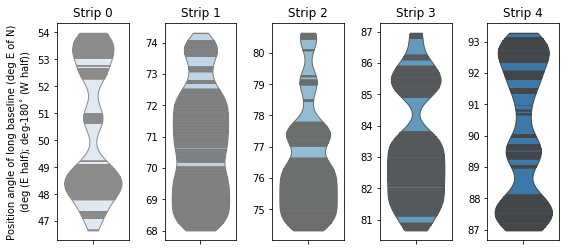

In [18]:
import seaborn as sns

figure, axes = plt.subplots(nrows=1,ncols=5,figsize=(9, 4))
#figure, axes0 = plt.subplots()

pal = sns.color_palette("Blues")
pal.as_hex()

'''
axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)
'''

sns.violinplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip0, color=pal[0], split=True, cut=0, bw=0.2,
                    scale="count", inner="stick", linewidth=1, scale_hue=False, ax=axes[0])
axes[0].set_ylabel("Position angle of long baseline (deg E of N)\n(deg (E half); deg-180$^{\circ}$ (W half))")
axes[0].set_title("Strip 0")

sns.violinplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip1, color=pal[1], split=True, cut=0, bw=0.2,
                    scale="count", inner="stick", linewidth=1, scale_hue=False, ax=axes[1])
axes[1].set_title("Strip 1")
axes[1].set_ylabel("")
#axes[1].collections[0].set_edgecolor('k')

sns.violinplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip2, color=pal[2], split=True, cut=0, bw=0.2,
                    scale="count", inner="stick", linewidth=1, scale_hue=False, ax=axes[2])
axes[2].set_title("Strip 2")
axes[2].set_ylabel("")

sns.violinplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip3, color=pal[3], split=True, cut=0, bw=0.2,
                    scale="count", inner="stick", linewidth=1, scale_hue=False, ax=axes[3])
axes[3].set_title("Strip 3")
axes[3].set_ylabel("")

sns.violinplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip4, color=pal[4], split=True, cut=0, bw=0.2,
                    scale="count", inner="stick", linewidth=1, scale_hue=False, ax=axes[4])
axes[4].set_title("Strip 4")
axes[4].set_ylabel("")

plt.subplots_adjust(wspace=0.5)
#plt.tight_layout()
plt.savefig("junk.pdf")

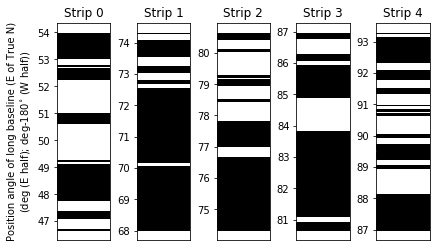

In [21]:
import seaborn as sns

figure, axes = plt.subplots(nrows=1,ncols=5,figsize=(9, 4))
#figure, axes0 = plt.subplots()

pal = sns.color_palette("Blues")
pal.as_hex()

'''
axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)
'''

sns.rugplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip0, color="k", alpha=1, height=1, ax=axes[0])
axes[0].set_ylabel("Position angle of long baseline (E of True N)\n(deg (E half); deg-180$^{\circ}$ (W half))")
axes[0].set_title("Strip 0")
axes[0].xaxis.set_visible(False)

sns.rugplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip1, color="k", alpha=1, height=1, ax=axes[1])
axes[1].set_title("Strip 1")
axes[1].set_ylabel("")
axes[1].set_xlim([0,0.1])
axes[1].xaxis.set_visible(False)

sns.rugplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip2, color="k", alpha=1, height=1, ax=axes[2])
axes[2].set_title("Strip 2")
axes[2].set_ylabel("")
axes[2].xaxis.set_visible(False)

sns.rugplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip3, color="k", alpha=1, height=1, ax=axes[3])
axes[3].set_title("Strip 3")
axes[3].set_ylabel("")
axes[3].xaxis.set_visible(False)

sns.rugplot(y="long_baseline_E", 
                    data=df_good_frames_only_strip4, color="k", alpha=1, height=1, ax=axes[4])
axes[4].set_title("Strip 4")
axes[4].set_ylabel("")
axes[4].xaxis.set_visible(False)

plt.subplots_adjust(wspace=0.5, right=0.7)
#plt.tight_layout()
plt.savefig("junk.pdf")